In [4]:
import pandas as pd
import os

file_path = "/content/NYPD_Complaint_Data_Historic_20251112.csv"
df = pd.read_csv(file_path, low_memory=False)
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,298702504,12/30/2024,05:00:00,12/31/2024,17:00:00,114.0,12/31/2024,341,PETIT LARCENY,321.0,...,(null),NaN,40.769926,-73.888860,"(40.769926, -73.88886)",PATROL BORO QUEENS NORTH,(null),25-44,WHITE HISPANIC,F
1,298695090,12/30/2024,22:00:00,12/31/2024,07:00:00,7.0,12/31/2024,578,HARRASSMENT 2,638.0,...,(null),NaN,40.711274,-73.984350,"(40.711274, -73.98435)",PATROL BORO MAN SOUTH,(null),25-44,WHITE HISPANIC,F
2,298672412,12/30/2024,21:45:00,12/30/2024,22:00:00,78.0,12/31/2024,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.678520,-73.983808,"(40.67852, -73.983808)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK HISPANIC,M
3,298698005,12/30/2024,17:00:00,12/31/2024,13:50:00,111.0,12/31/2024,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,U,NaN,40.740316,-73.759881,"(40.7403162891419, -73.75988117389221)",PATROL BORO QUEENS NORTH,(null),45-64,ASIAN / PACIFIC ISLANDER,F
4,298685372,12/30/2024,00:30:00,12/30/2024,04:00:00,105.0,12/31/2024,341,PETIT LARCENY,349.0,...,(null),NaN,40.750884,-73.717741,"(40.75088412701608, -73.71774149771856)",PATROL BORO QUEENS SOUTH,(null),65+,WHITE,F


In [5]:
df.info()

df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
df['YEAR'] = df['CMPLNT_FR_DT'].dt.year
df['YEAR'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646571 entries, 0 to 1646570
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1646571 non-null  object 
 1   CMPLNT_FR_DT       1646571 non-null  object 
 2   CMPLNT_FR_TM       1646571 non-null  object 
 3   CMPLNT_TO_DT       1544995 non-null  object 
 4   CMPLNT_TO_TM       1646571 non-null  object 
 5   ADDR_PCT_CD        1646477 non-null  float64
 6   RPT_DT             1646571 non-null  object 
 7   KY_CD              1646571 non-null  int64  
 8   OFNS_DESC          1646571 non-null  object 
 9   PD_CD              1645414 non-null  float64
 10  PD_DESC            1646571 non-null  object 
 11  CRM_ATPT_CPTD_CD   1646571 non-null  object 
 12  LAW_CAT_CD         1646571 non-null  object 
 13  BORO_NM            1646571 non-null  object 
 14  LOC_OF_OCCUR_DESC  1646571 non-null  object 
 15  PREM_TYP_DESC      1646571 non-n

,count
YEAR,
2024,565118
2023,552442
2022,529011


In [6]:
cols = {
    'CMPLNT_NUM': 'complaint_id',
    'CMPLNT_FR_DT': 'date',
    'CMPLNT_FR_TM': 'time',
    'OFNS_DESC': 'offense',
    'LAW_CAT_CD': 'severity',
    'BORO_NM': 'borough',
    'ADDR_PCT_CD': 'precinct',
    'Latitude': 'lat',
    'Longitude': 'lon'
}

existing_cols = {k: v for k, v in cols.items() if k in df.columns}

df_clean = df[list(existing_cols.keys())].rename(columns=existing_cols)

df_clean.head()

,complaint_id,date,time,offense,severity,borough,precinct,lat,lon
0,298702504,2024-12-30,05:00:00,PETIT LARCENY,MISDEMEANOR,QUEENS,114.0,40.769926,-73.888860
1,298695090,2024-12-30,22:00:00,HARRASSMENT 2,VIOLATION,MANHATTAN,7.0,40.711274,-73.984350
2,298672412,2024-12-30,21:45:00,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,78.0,40.678520,-73.983808
3,298698005,2024-12-30,17:00:00,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,QUEENS,111.0,40.740316,-73.759881
4,298685372,2024-12-30,00:30:00,PETIT LARCENY,MISDEMEANOR,QUEENS,105.0,40.750884,-73.717741


In [7]:
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day
df_clean['weekday'] = df_clean['date'].dt.weekday

df_clean[['date','year','month','weekday']].head()

,date,year,month,weekday
0,2024-12-30,2024,12,0
1,2024-12-30,2024,12,0
2,2024-12-30,2024,12,0
3,2024-12-30,2024,12,0
4,2024-12-30,2024,12,0


In [8]:
# only needed years

df_clean = df_clean[df_clean['year'].isin([2022, 2023, 2024])]
df_clean.head(), df_clean.shape

(  complaint_id       date      time                         offense  \
 0    298702504 2024-12-30  05:00:00                   PETIT LARCENY   
 1    298695090 2024-12-30  22:00:00                   HARRASSMENT 2   
 2    298672412 2024-12-30  21:45:00    ASSAULT 3 & RELATED OFFENSES   
 3    298698005 2024-12-30  17:00:00  CRIMINAL MISCHIEF & RELATED OF   
 4    298685372 2024-12-30  00:30:00                   PETIT LARCENY   
 
       severity    borough  precinct        lat        lon  year  month  day  \
 0  MISDEMEANOR     QUEENS     114.0  40.769926 -73.888860  2024     12   30   
 1    VIOLATION  MANHATTAN       7.0  40.711274 -73.984350  2024     12   30   
 2  MISDEMEANOR   BROOKLYN      78.0  40.678520 -73.983808  2024     12   30   
 3  MISDEMEANOR     QUEENS     111.0  40.740316 -73.759881  2024     12   30   
 4  MISDEMEANOR     QUEENS     105.0  40.750884 -73.717741  2024     12   30   
 
    weekday  
 0        0  
 1        0  
 2        0  
 3        0  
 4        0  ,

In [9]:
# clean lat/lon values

df_clean = df_clean[
    (df_clean['lat'].between(40, 41)) &
    (df_clean['lon'].between(-75, -73))
]

df_clean.shape

(1646528, 13)

In [10]:
df_clean = df_clean.dropna(subset=['date', 'offense', 'lat', 'lon'])
df_clean.shape

(1646528, 13)

In [11]:
clean_path = "/content/cleaned_nypd_2022_2024.csv"
df_clean.to_csv(clean_path, index=False)

clean_path

'/content/cleaned_nypd_2022_2024.csv'

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

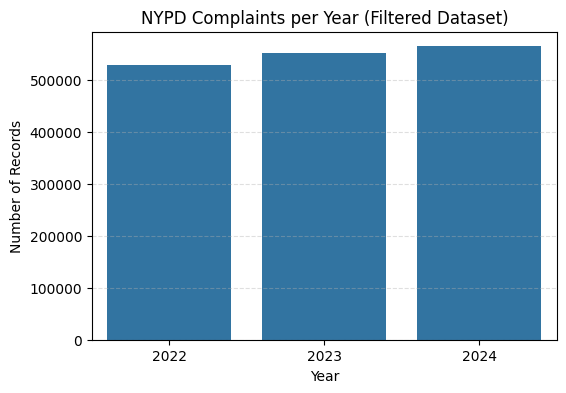

,count
year,
2022,529008
2023,552429
2024,565091


In [13]:
year_counts = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title("NYPD Complaints per Year (Filtered Dataset)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

year_counts